# Manpower Optimisation Labs
by Matara Gerald

## Hungarian Assignment Algorithm

The Hungarian Assignment Algorithm, also known as the Kuhn-Munkres algorithm, is a combinatorial optimization algorithm that solves the assignment problem in polynomial time. The assignment problem involves finding the optimal way to assign a set of workers to a set of tasks such that the total cost is minimized (or maximized, depending on the problem).

### Key Features:
- **Input**: A cost matrix where each element represents the cost of assigning a specific worker to a specific task.
- **Output**: An optimal assignment of workers to tasks that minimizes the total cost.
- **Applicability**: Works for both square (n x n) and rectangular (n x m) matrices. In rectangular cases, some workers or tasks may remain unassigned.

### Steps of the Algorithm:
1. Subtract the smallest value in each row from all elements of that row.
2. Subtract the smallest value in each column from all elements of that column.
3. Cover all zeros in the matrix using the minimum number of horizontal and vertical lines.
4. If the number of lines equals the size of the matrix, an optimal assignment is found. Otherwise, adjust the matrix and repeat.

### Advantages:
- Efficient for solving large-scale assignment problems.
- Guarantees an optimal solution.

### Applications:
- Task scheduling.
- Resource allocation.
- Matching problems in graph theory.

In [1]:
import numpy as np
from solver import load_cost_matrix_from_excel, solve_hungarian_assignment
from visualizer import visualize_cost_matrix, visualize_bipartite_graph


def test_hungarian_assignment_from_excel(file_path):
    """
    Test the Hungarian Assignment algorithm using both types of Excel files.
    This function generates the test files and runs the algorithm on them.
    """
    # Generate the test files
    # tabular_file_path, list_file_path = generate_test_excel_files()
    
    print("\n" + "="*50)
    print("TESTING HUNGARIAN ASSIGNMENT ALGORITHM")
    print("="*50)
    
    # Test with tabular format
    print("\nTEST 1: Tabular Format Excel File")
    print("-"*50)
    try:
        cost_matrix, workers, tasks = load_cost_matrix_from_excel(
            file_path,
            verbose=True
        )
        
        # Solve the assignment problem
        assignments, total_cost, worker_indices, task_indices = solve_hungarian_assignment(cost_matrix)
        
        print("\nAssignment Results:")
        print(f"Total cost: {total_cost}")
        
        # Create human-readable results
        print("\nHuman-readable assignments:")
        for worker_idx, task_idx in assignments:
            worker_name = workers[worker_idx]
            task_name = tasks[task_idx]
            cost = cost_matrix[worker_idx, task_idx]
            print(f"  {worker_name} -> {task_name} (Cost: {cost})")
            
        print("\nTest 1 completed successfully!")
        
    except Exception as e:
        print(f"Error in Test 1: {e}")
   
    # Generate visualizations
    try:
        # Visualize cost matrix as heatmap
        visualize_cost_matrix(cost_matrix, assignments, "Cost Matrix Heatmap")
        
        # Visualize as bipartite graph
        visualize_bipartite_graph(cost_matrix, assignments, workers, tasks, 
                                 "Worker-Task Assignment Network")
        
    except Exception as e:
        print(f"Error in visualization: {e}")



TESTING HUNGARIAN ASSIGNMENT ALGORITHM

TEST 1: Tabular Format Excel File
--------------------------------------------------
Successfully loaded Excel file from test_data.xlsx
Sheet: 0
DataFrame shape: (5, 7)
Processing in tabular format
Created cost matrix with shape: (5, 6)
Number of workers: 5
Number of tasks: 6
Input Cost Matrix (5 workers x 6 tasks):
[[ 7000. 20000. 15000. 11000.  8000.  7000.]
 [19000. 11000. 11000.  4000.  8000.  3000.]
 [ 2000. 12000.  6000.  2000.  1000. 12000.]
 [12000. 17000. 10000. 16000. 15000. 15000.]
 [19000. 12000. 20000.  3000.  5000. 19000.]]

Optimal Assignments (Worker Index -> Task Index):
  Worker 0 -> Task 0 (Cost: 7000.0)
  Worker 1 -> Task 5 (Cost: 3000.0)
  Worker 2 -> Task 4 (Cost: 1000.0)
  Worker 3 -> Task 2 (Cost: 10000.0)
  Worker 4 -> Task 3 (Cost: 3000.0)

Total Minimum Cost: 24000.0
Unassigned Tasks: [1]

Assignment Results:
Total cost: 24000.0

Human-readable assignments:
  Employee 1 -> Task 1 (Cost: 7000.0)
  Employee 2 -> Task 6 (

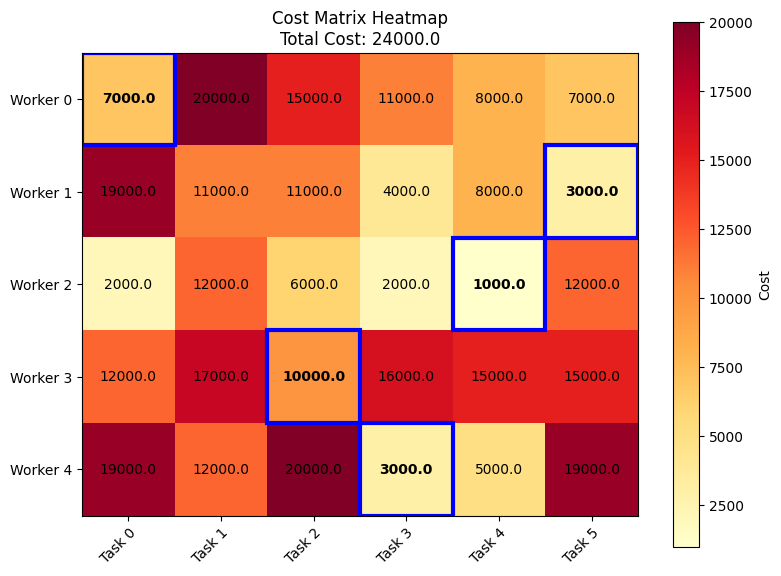

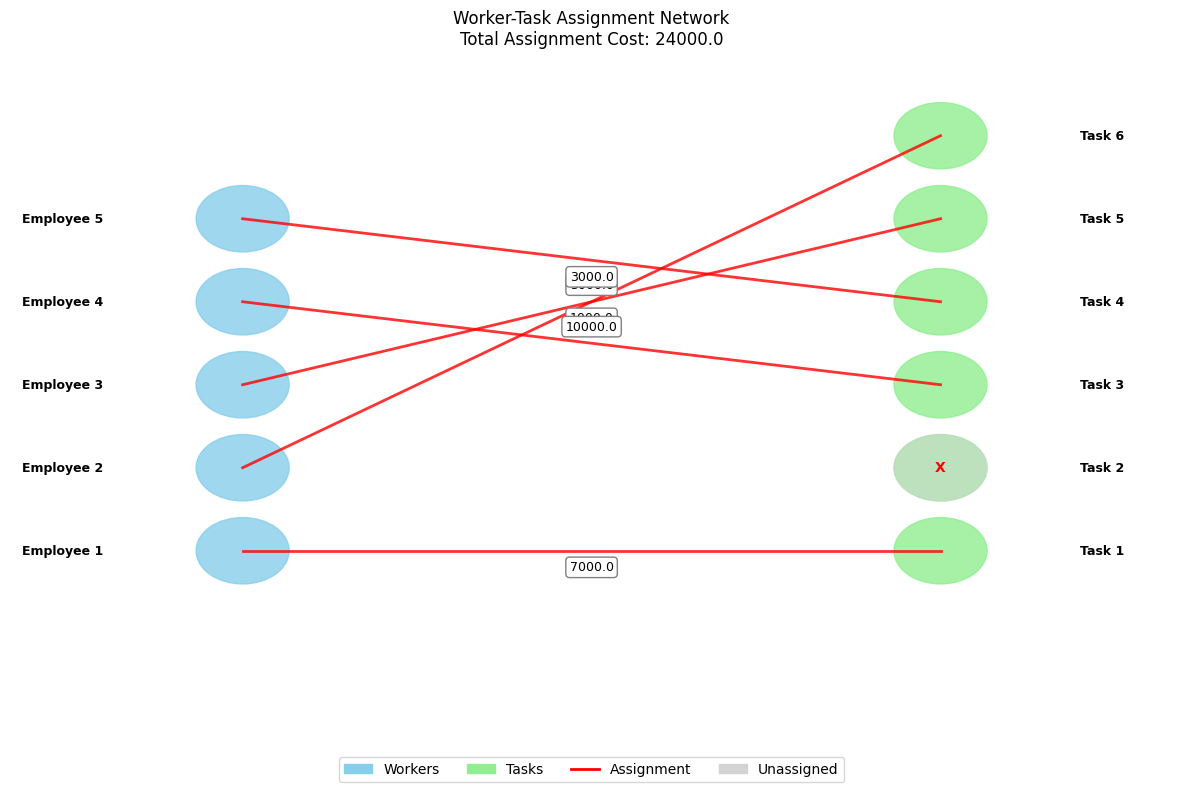

In [2]:
test_hungarian_assignment_from_excel("test_data.xlsx")

### Example Usage: Minimization (Square Matrix)

In [3]:
cost_matrix_min = np.array([
    [90, 76, 75],
    [35, 85, 55],
    [125, 95, 90]
])
assignments_min, cost_min, _, _ = solve_hungarian_assignment(cost_matrix_min)


Input Cost Matrix (3 workers x 3 tasks):
[[ 90  76  75]
 [ 35  85  55]
 [125  95  90]]

Optimal Assignments (Worker Index -> Task Index):
  Worker 0 -> Task 1 (Cost: 76)
  Worker 1 -> Task 0 (Cost: 35)
  Worker 2 -> Task 2 (Cost: 90)

Total Minimum Cost: 201


### Example Usage: Rectangular Matrix (More Workers than Tasks)

In [4]:
cost_matrix_rect = np.array([
    [90, 76],
    [35, 85],
    [125, 95]
])

assignments_rect, cost_rect, assigned_w, assigned_t = solve_hungarian_assignment(cost_matrix_rect)

Input Cost Matrix (3 workers x 2 tasks):
[[ 90  76]
 [ 35  85]
 [125  95]]

Optimal Assignments (Worker Index -> Task Index):
  Worker 0 -> Task 1 (Cost: 76)
  Worker 1 -> Task 0 (Cost: 35)

Total Minimum Cost: 111
Unassigned Workers: [2]
